## **Linear Reggresion**

**Linear Regression** models the relationship between a dependent variable (y) and one or more independent variables (X) using a linear approach. The fundamental equation for simple linear regression with one feature:

**equation:**

$$ \hat{y} = wx + b$$

Explanation:

* y: dependent variable (target).
* x: independent variable (predictor).
* w: weight or coefficient (slope of the regression line, same as β1 before).
* b: bias or intercept (value of y when x = 0, same as β0 before).

and then to calculate the error of the prediction, MSE (mean squared error)

**MSE:**
measures average squared difference between predictions and actual values:

$$J(w,b)=\frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2$$

 **Gradient Descent for MSE:**
 updates parameters to minimize MSE:

$$J'(m,b) = \begin{bmatrix} \frac{∂J}{∂m} \\ \frac{∂J}{∂b} \end{bmatrix} = \begin{bmatrix} \frac{1}{n} \sum_{}^{} 2x_i(y_i - (wx_i + b)) \\ \frac{1}{n} \sum_{}^{} -2(y_i - (mx_i + b)) \end{bmatrix}$$


 **Explanation:**

 * **Gradient:** The formula represents the gradient of the cost function (MSE) with respect to the weight (`w`, denoted as `m` here) and bias (`b`). The gradient points in the direction of the steepest ascent of the cost function.
 * **Partial Derivatives:**
     * `∂J/∂m`: This is the partial derivative of the cost function with respect to the weight (`w`). It represents how much the cost function changes with a small change in the weight.
     * `∂J/∂b`: This is the partial derivative of the cost function with respect to the bias (`b`). It represents how much the cost function changes with a small change in the bias.
 * **Update Rule:** Gradient descent uses these partial derivatives to update the weight and bias in the opposite direction of the gradient, aiming to minimize the cost function. The update rule is typically:
     * `w = w - α * ∂J/∂w`
     * `b = b - α * ∂J/∂b`
     Where `α` is the learning rate, which controls the step size of the updates.
 * **Intuition:**

     * By taking steps proportional to the negative gradient, the algorithm iteratively moves towards the minimum of the cost function, where the error is minimized.
     * The partial derivatives provide information about the direction and magnitude of the change needed in the weight and bias to reduce the error.
     * The learning rate determines how quickly the algorithm converges to the minimum. A larger learning rate can lead to faster convergence but might overshoot the minimum.


**but more simpler model to updating parameters:**
     $$  \frac{1}{N} \sum_{i=1}^{n} 2x_i(y_i - \hat{y})$$

In [31]:
import numpy as np
import matplotlib.pyplot as plt
'''
important step is:
  Training
  1. Initialize W as zero
  2. Initialize B as zero

  given a data point:
  1. predict result by using y = wx + b
  2. calculate error
  3. use gradient descent to figure out new weight and bias
  4. repeat number times

  testing
'''

class LinearRegression:

  def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        # Note that the weights and bias are always in zero in the beginning.    
    
  def fit(self, X, y):
        """
         Train the Linear Regression model using gradient descent.

         Parameters:
         X : ndarray Training data features (n_samples, n_features).
         y : ndarray Training data labels/targets (n_samples,).
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
        
            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            #update parameters
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
  def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
  
  def mean_squared_error(self, X, y):
       y_pred = self.predict(X)
       mse = np.mean((y-y_pred) ** 2)
       return mse
  
  def r_squared(self, X, y):
        """
        Calculate the R-squared value of the model.

        Parameters:
        X : ndarray
            Test data features (n_samples, n_features).
        y : ndarray
            True values (n_samples,).

        Returns:
        r2 : float
            R-squared value.
        """
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)



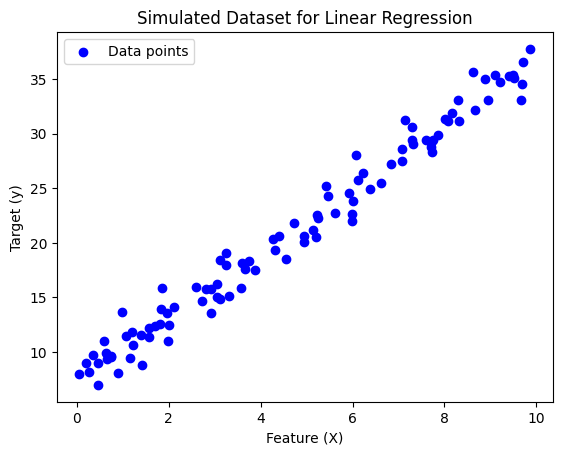

In [32]:
# Simulated dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features (100 samples, single feature)
true_slope = 3.0
true_intercept = 7.0
noise = np.random.randn(100, 1) * 1.5  
y = true_slope * X + true_intercept + noise


# Visualizing the dataset
plt.scatter(X, y, color="blue", label="Data points")
plt.title("Simulated Dataset for Linear Regression")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

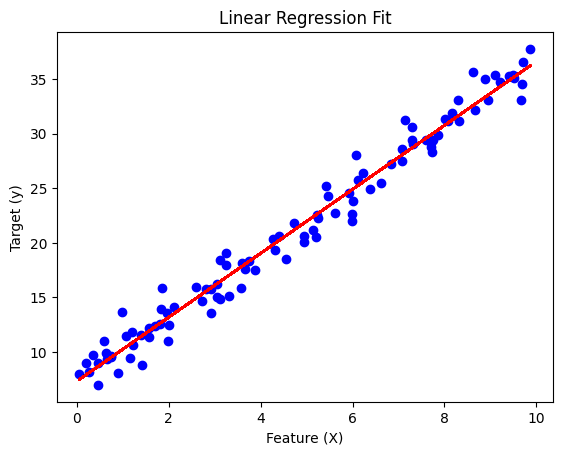

Learned Weights: [[2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103402 2.93103402 2.93103402 2.93103402
  2.93103402 2.93103402 2.93103

In [33]:
# Training the model
model = LinearRegression(learning_rate=0.01, n_iters=100000)
model.fit(X, y)

# Predicting and visualizing the results
y_pred = model.predict(X)

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label="Regression line")
plt.title("Linear Regression Fit")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.show()

# Display the learned parameters
print(f"Learned Weights: {model.weights}")
print(f"Learned Bias: {model.bias}")

In [34]:
mse = model.mean_squared_error(X, y)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.8148152689258703


In [35]:
r2 = model.r_squared(X, y)
print(f"R Squared: {r2}")

R Squared: -1.3543201648920062


**1. Mean Squared Error (MSE):**

Nilai yang lebih kecil lebih baik. MSE menunjukkan rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual.

Dalam kasus Anda, MSE adalah 3.226, yang menunjukkan bahwa model memiliki rata-rata kesalahan kuadrat sebesar itu. Namun, interpretasi nilai MSE tergantung pada skala target variabel 𝑦. Jika nilai 𝑦 cukup besar, MSE ini mungkin tergolong kecil.

---